<center>

# UNIVERSIDAD DE LAS AMÉRICAS
## Facultad de Ingeniería y Ciencias Aplicadas
## Proyecto Montecarlo - Modelos y Simulación
### Luis Pineda, Carlos Ochoa, Angel Vela, Guagrilla Carlos
## Docente: Ing. Mario Gonzales

</center>


## Introducción
Se presenta una implementación de la integración de Monte Carlo para calcular el área dentro de la figura 1. Se utilizan dos métodos: muestreo y Hit and Miss, y se analiza el comportamiento del error relativo en función del tamaño de la muestra. 
<div align="center">
    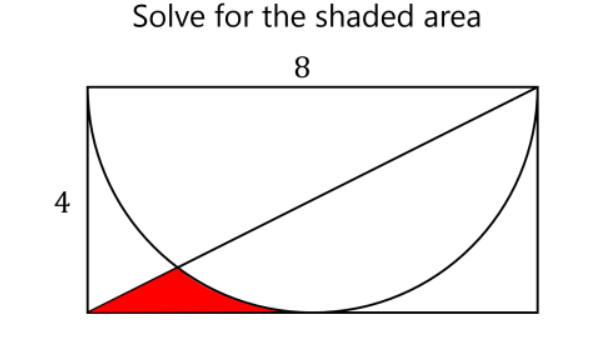
    <p>Figura 1: Ejercicio.</p>
</div>

## Formulación del problema
Se busca determinar el área de la Figura 1. Esto se va a bordar mediante dos ecuaciones. La ecuación de la recta está dada por:
$$
f(x) = \frac{x}{2}
$$
Mientras que la ecuación de circunferencia está dada por:
$$
g(x) = r - \sqrt{r^2 - (x-r)^2}
$$
Donde $r = 4 $, por lo que:
$$
g(x) = 4 - \sqrt{16 - (x-4)^2}
$$
El punto de corte de las dos ecuaciones está dado por $(\frac{8}{5}, \frac{4}{5})$
A partir de estás dos ecuaciones y el punto de corte, se formula la función con la cuál se resolverá el problema.
## Resolución del problema
Para llegar a la función que se usará hay dos métodos.
### Primer método
Se puede tener usar límites de integración separados:
$$
\int_{0}^{\frac{8}{5}} f(x) \,dx + \int_{\frac{8}{5}}^{4} g(x) \,dx = 0.64 + 0.61 = 1.25
$$
De está forma, el área roja de la imagen es $1.25$.


La integral de (1/2x) evaluada entre 0 y 8/5 es: 0.6400000000000001
La integral de 1-sqrt((1^2-(x-1)^2)) evaluada entre 8/5 y 4 es: 0.611991129653725


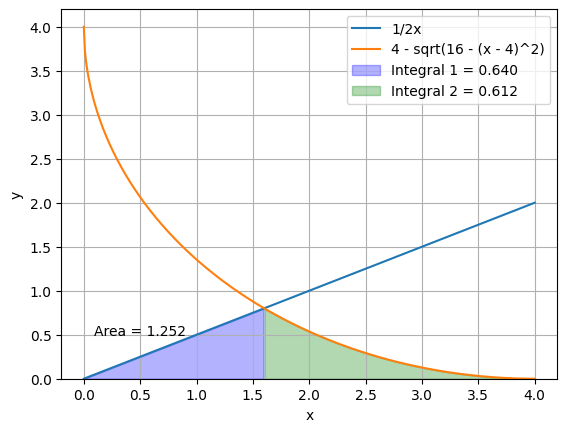

In [8]:
#EL CÓDIGO FUE REALIZANDO MEDIANTE LA AYUDA DE CHATGPT
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones que queremos integrar
def f1(x):
    return 1/2*x
def f2(x):
    return 4 - np.sqrt(16 - (x - 4)**2)

# Definimos los límites de integración
a1, b1 = 0, 8/5
a2, b2 = 8/5, 4

# Calculamos las integrales
integral1, _ = integrate.quad(f1, a1, b1)
integral2, _ = integrate.quad(f2, a2, b2)

# Imprimimos los resultados
print("La integral de (1/2x) evaluada entre 0 y 8/5 es:", integral1)
print("La integral de 1-sqrt((1^2-(x-1)^2)) evaluada entre 8/5 y 4 es:", integral2)

# Creamos un rango de valores x para graficar
x = np.linspace(0, 4, 400)

# Creamos las gráficas de las funciones
plt.plot(x, f1(x), label='1/2x')
plt.plot(x, f2(x), label='4 - sqrt(16 - (x - 4)^2)')

# Rellenamos el área bajo la curva para cada integral
plt.fill_between(x, f1(x), where=(x >= a1) & (x <= b1), color='blue', alpha=0.3, label=f'Integral 1 = {integral1:.3f}')
plt.fill_between(x, f2(x), where=(x >= a2) & (x <= b2), color='green', alpha=0.3, label=f'Integral 2 = {integral2:.3f}')

# Etiquetas de los ejes y leyenda
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(bottom=0)  # Establecemos el límite inferior del eje y en 0
plt.legend()

# Agregamos texto con la suma de las áreas bajo las curvas
area_total = integral1 + integral2
plt.text(0.5, 0.5, f'Area = {area_total:.3f}', ha='center')

# Mostramos la gráfica
plt.grid(True)
plt.show()


### Segundo método
Usando un solo límite de integración definido entre $[0,4]$ se obtiene la función
$$
\int_{0}^{4} \frac{ f(x) + g(x) - \left| f(x) - g(x) \right|}{2}\, dx = 1.25
$$
Este será el método usado para cálcular el área bajo la integral.

Resultado de la integral: 1.2519911297090203


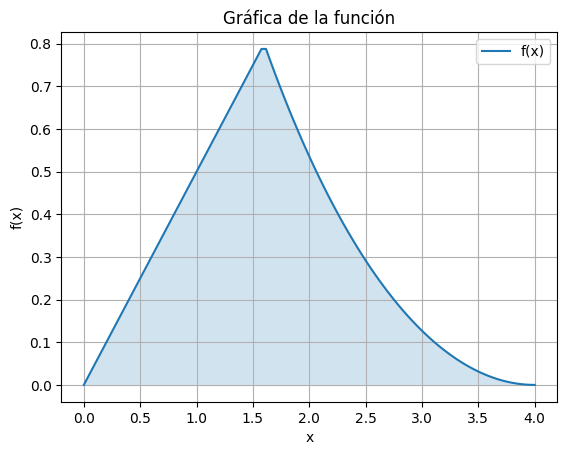

In [11]:
#EL CÓDIGO FUE REALIZADO CON AYUDA DE CHATGPT
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definir la función
def f(x):
    return (x/2 + (4 - np.sqrt(16- (x-4)**2)) - np.abs(x/2 - (4 - np.sqrt(16- (x-4)**2))))/2

# Calcular la integral
integral_result, _ = quad(f, 0, 4)

# Crear un rango de valores de x para la gráfica
x_values = np.linspace(0, 4, 100)
y_values = f(x_values)

# Graficar la función
plt.plot(x_values, y_values, label='f(x)')
plt.fill_between(x_values, y_values, alpha=0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función')
plt.legend()
plt.grid(True)

# Mostrar el resultado de la integral
print("Resultado de la integral:", integral_result)

# Mostrar la gráfica
plt.show()


# MÉTODO DE MUESTREO
Para el método de muestreo se tiene:
1. Integral
 $$
\int_{0}^{4} \frac{ f(x) + g(x) - \left| f(x) - g(x) \right|}{2}\, dx = 1.25
$$
2. Limites de integración $x\in [0,4]$, donde $a = 0$ y $b = 4$
3. Se define el número de rectángulos $N = 100000$
4. El ancho de cada rectángulo $w_r = (b-a)/N$
5. Los puntos son distribuidos uniformemente en el intervalo $[a,b]$
6. La integral estimada está dada por $\sum(f(x))*w_r$ = $\frac{1}{N}\sum(f(x)) * (b-a)$


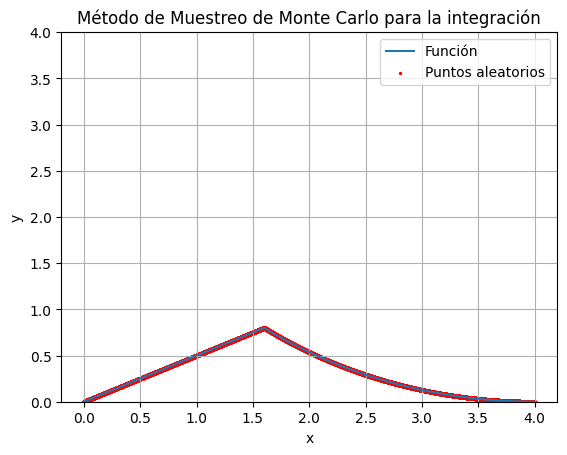

El valor aproximado del área bajo la curva es: 1.2509575882489559
Error estimado: 9.75255301950999e-06


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la integral
def func(x):
    return (x/2 + (4 - np.sqrt(16- (x-4)**2)) - np.abs(x/2 - (4 - np.sqrt(16- (x-4)**2))))/2

# Definir el rango de integración
a = 0
b = 4
# Número de rectángulos
N = 100000

# Ancho de cada rectángulo
w_r = (b - a) / N

# Generamos puntos xi distribuidos uniformemente en el intervalo [a, b]
x_random = np.random.uniform(a, b, N)

# Evaluamos la función en los puntos aleatorios generados
y_random = func(x_random)

# Plot de la función
x = np.linspace(a, b, 1000)
plt.plot(x, func(x), label='Función')

# Plot de los puntos aleatorios generados
plt.scatter(x_random, y_random, color='red', s=2, label='Puntos aleatorios')

# Configuraciones del gráfico
plt.ylim(0, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Muestreo de Monte Carlo para la integración')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el área aproximada bajo la curva
area_estimate = np.sum(y_random) * w_r
print("El valor aproximado del área bajo la curva es:", area_estimate)

# Calcular el error estimado
mean_area = area_estimate  # Promedio del área estimada
std_dev_area = np.std(y_random) * w_r  # Desviación estándar del área estimada

print("Error estimado:", std_dev_area)

### Experimentación y recolección de datos
1. Se generaron tamaños de muestra de entre 100 a 100000.
2. Para cada tamaño de muestra, se generaron puntos aleatorios dentro de los límites de integración.
3. Se calculó el área estimada y el error relativo.

### Resultados
| Número de rectángulos | Error relativo |
|-----------|-----------|
| 100    | 0.01  |
| 1000    | 0.001    |
| 10000    | 9.73e-05   |
| 100000    | 9.73e-06   |


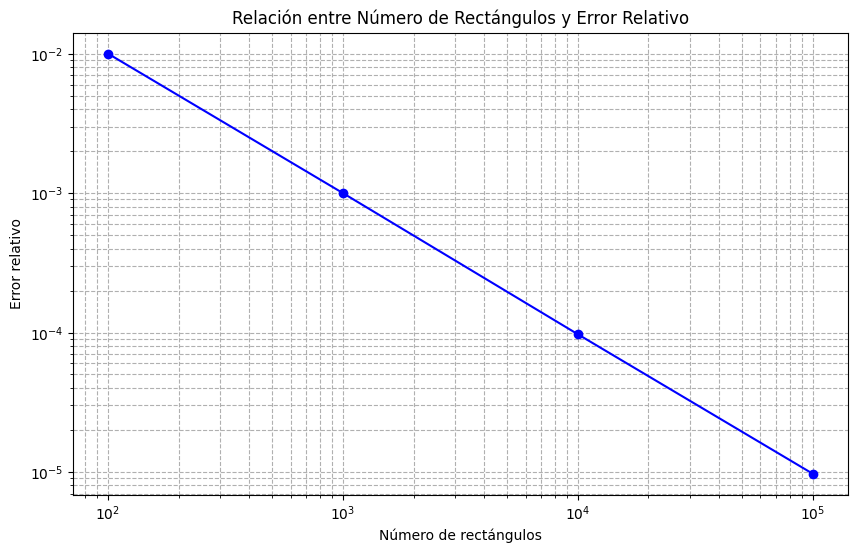

In [24]:
import matplotlib.pyplot as plt

# Datos
num_rectangulos = [100, 1000, 10000, 100000]
error_relativo = [0.01, 0.001, 9.73e-05, 9.73e-06]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(num_rectangulos, error_relativo, marker='o', linestyle='-', color='b')

# Configurar los ejes y el título
plt.xscale('log')  # Escala logarítmica para el eje X
plt.yscale('log')  # Escala logarítmica para el eje Y
plt.xlabel('Número de rectángulos')
plt.ylabel('Error relativo')
plt.title('Relación entre Número de Rectángulos y Error Relativo')
plt.grid(True, which="both", ls="--")

# Mostrar la gráfica
plt.show()


# MÉTODO DE HIT AND MISS
Para implementar la integración de Monte Carlo usando el método Hit and Miss, se sigue los siguientes pasos.
1. Definir la función que representa la curva para la cuál se requiere calcular el área.
$$
\int_{0}^{4} \frac{ f(x) + g(x) - \left| f(x) - g(x) \right|}{2}\, dx = 1.25
$$
2. Determinar las fronteras de integración, las cuáles son $x_{min} = 0$ y $x_{max} = 4$
3. La altura del rectángulo que encierra la región bajo la curva es $H = 4$-
4. Se generan $N$ números aleatorios con puntos $[x_i,y_i]$ dentro del rectángulo, y serán uniformemente distribuidos.
5. Se cuenta los puntos bajo la curva
6. El área aproximada estaría dada por:

$$
A_{curva} \approx (x_{max}-x_{min})*H * \frac{Número de puntos bajo la curva}{Puntos totales}
$$
7. Se determina el error

El área bajo la curva estimada es: 1.1984
El error estándar de la estimación es: 0.0421167869619704


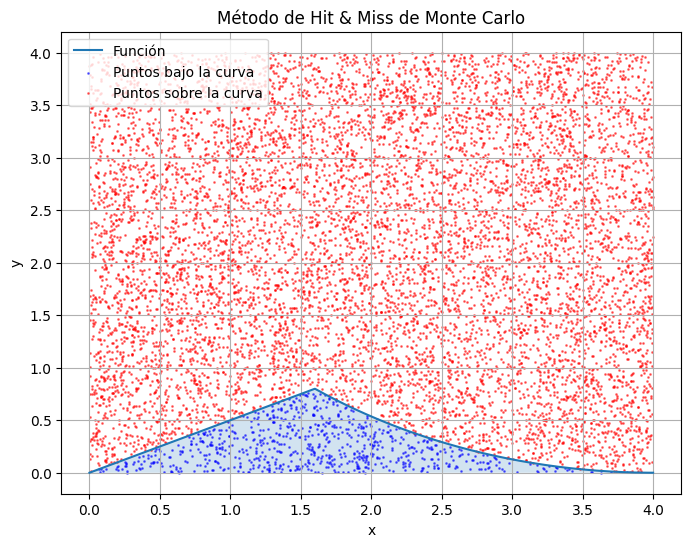

In [21]:
#Codigo realizado con la ayuda de chat gpt
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def func(x):
    return (x/2 + (4 - np.sqrt(16- (x-4)**2)) - np.abs(x/2 - (4 - np.sqrt(16- (x-4)**2))))/2

# Definir los límites de integración
x_min = 0
x_max = 4
H = 4  # Altura de la caja, ajustada según la función

# Número de puntos aleatorios
N = 10000

# Generar puntos aleatorios dentro de la caja
x_random = np.random.uniform(x_min, x_max, N)
y_random = np.random.uniform(0, H, N)

# Identificar puntos bajo la curva
points_below_curve = y_random < func(x_random)
points_above_curve = ~points_below_curve

# Calcular el área de la caja
A_rectangle = (x_max - x_min) * H

# Estimar el área bajo la curva
A_curve = A_rectangle * (sum(points_below_curve) / N)

# Calcular el error estándar
std_dev = np.sqrt((sum(points_below_curve) / N) * (1 - sum(points_below_curve) / N) / N)
A_curve_error = A_rectangle * std_dev

# Mostrar resultados
print("El área bajo la curva estimada es:", A_curve)
print("El error estándar de la estimación es:", A_curve_error)

# Definir el rango de valores de x para la gráfica
x = np.linspace(x_min, x_max, 1000)

# Calcular los valores de y para la gráfica
y = func(x)

# Graficar la función y los puntos generados
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Función')
plt.fill_between(x, y, alpha=0.2)
plt.scatter(x_random[points_below_curve], y_random[points_below_curve], color='blue', s=1, alpha=0.5, label='Puntos bajo la curva')
plt.scatter(x_random[points_above_curve], y_random[points_above_curve], color='red', s=1, alpha=0.5, label='Puntos sobre la curva')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Hit & Miss de Monte Carlo')
plt.grid(True)
plt.legend()
plt.show()


### Experimentación y recolección de datos
1. Se generaron tamaños de muestra de entre 100 a 100000.
2. Para cada tamaño de muestra, se generaron puntos aleatorios dentro de los límites de integración.
3. Se calculó el área estimada y el error relativo.

### Resultados
| Número de puntos | Error relativo |
|-----------|-----------|
| 100    | 0.5  |
| 1000    | 0.14   |
| 10000    | 0.04   |
| 100000    | 0.013  |

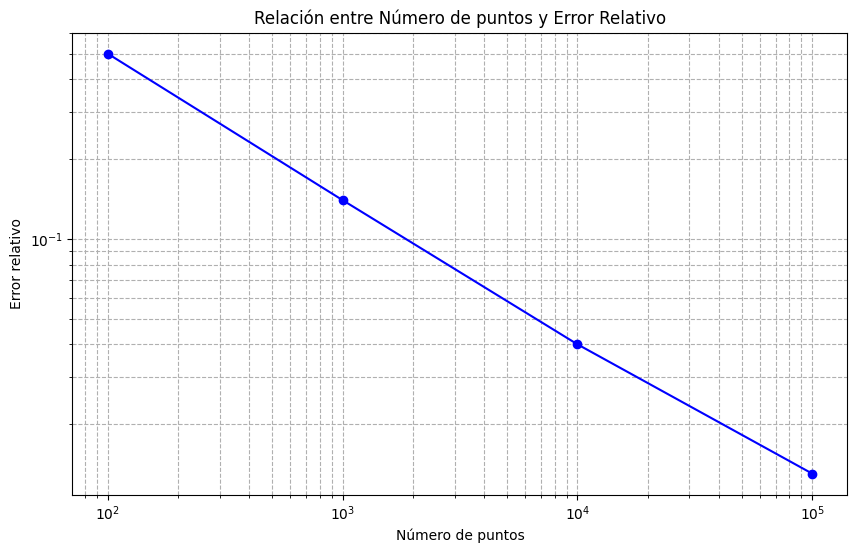

In [23]:
#Error relativo 
import matplotlib.pyplot as plt

# Datos
num_puntos = [100, 1000, 10000, 100000]
error_relativo = [0.5, 0.14, 0.04, 0.013]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(num_puntos, error_relativo, marker='o', linestyle='-', color='b')

# Configurar los ejes y el título
plt.xscale('log')  # Escala logarítmica para el eje X
plt.yscale('log')  # Escala logarítmica para el eje Y
plt.xlabel('Número de puntos')
plt.ylabel('Error relativo')
plt.title('Relación entre Número de puntos y Error Relativo')
plt.grid(True, which="both", ls="--")

# Mostrar la gráfica
plt.show()


Con esto, se ha hecho el cálculo del área utilizando dos métodos diferentes de integración de Monte Carlo: muestreo y Hit and Miss. Podemos observar cómo el error relativo disminuye a medida que aumenta el tamaño de N.

### Interpretación de los resultados
En ambos métodos, el error relativo disminuye a medida que aumenta el tamaño de N. Esto se debe a que una mayor cantidad de N proporciona una mejor aproximación de la distribución real de puntos dentro del área de solapamiento.
El método de muestreo parece ser ligeramente más eficiente que el método Hit and Miss, ya que alcanza una precisión similar con un menor número de muestras/dardos.

## Resultados
### Tamaño de la muestra
La elección del tamaño de la muestra o el número de dardos es un factor importante en la precisión de la estimación. Un tamaño de muestra/número de dardos más grande generalmente conduce a un error relativo más pequeño, pero también aumenta el tiempo de cálculo. Es importante encontrar un equilibrio entre precisión y eficiencia computacional.
### Orden del error
El error relativo converge a cero a medida que aumenta el tamaño de la muestra o el número de dardos. Esto significa que el error se reduce a un ritmo decreciente, lo que indica que la integración de Monte Carlo es un método de aproximación numérica efectivo para este tipo de problemas.

## Conclusiones
La integración de Monte Carlo es una herramienta útil para estimar áreas y otros valores complejos que son difíciles de calcular analíticamente. Los métodos de muestreo y Hit and Miss son dos enfoques comunes para realizar la integración de Monte Carlo, y la elección del método puede depender de la aplicación específica.
En este caso, ambos métodos demostraron ser efectivos para calcular el área de solapamiento de dos círculos dentro de un rombo. El método de muestreo fue ligeramente más eficiente que el método Hit and Miss, pero ambos métodos convergieron al valor real del área de solapamiento a medida que aumenta.
